# Usage (quick version)
This is a quick tour of CovsirPhy. Details of datasets and scenario analysis will be explained.

## Preparation
Prepare the packages.

In [1]:
# Standard users
# !pip install covsirphy

In [2]:
# Developers (Note: this notebook is in example directory)
import os
os.chdir("../")

In [3]:
import covsirphy as cs
cs.__version__

'2.13.0-alpha.fix.417'

## Dataset preparation
Download the datasets to "input" direcotry and load them.

In [4]:
data_loader = cs.DataLoader("input")
# The number of cases (JHU style)
jhu_data = data_loader.jhu(verbose=True)
# Population in each country
population_data = data_loader.population(verbose=True)
# Government Response Tracker (OxCGRT)
oxcgrt_data = data_loader.oxcgrt(verbose=True)

### Scenario analysis
As an example, we will analysis the number of cases in Japan.

In [5]:
snl = cs.Scenario(jhu_data, population_data, country="Japan", province=None)

### Check records
Let's see the records at first. `Scenario.records()` method return the records as a pandas dataframe and show a line plot.

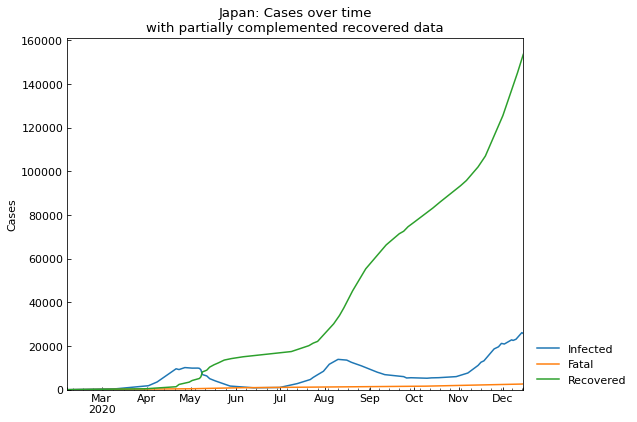

,Date,Confirmed,Infected,Fatal,Recovered
309,2020-12-11,171542,24026,2502,145014
310,2020-12-12,174299,24241,2534,147524
311,2020-12-13,177287,25439,2562,149286
312,2020-12-14,179653,26121,2585,150947
313,2020-12-15,181870,25708,2643,153519


In [6]:
record_df = snl.records()
record_df.tail()

We can calculate the number of new cases with `Scenario.record_diff()` method.

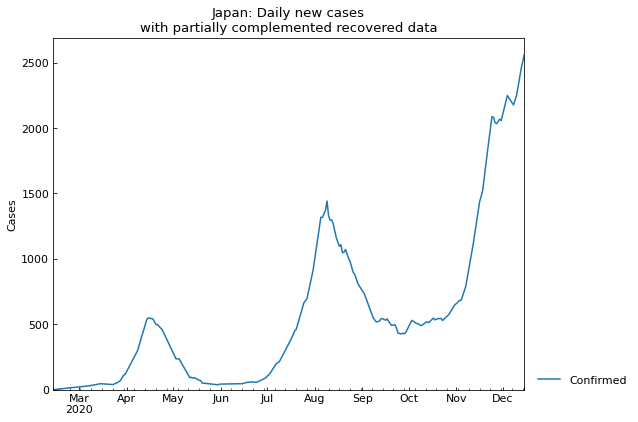

In [7]:
_ = snl.records_diff(variables=["Confirmed"], window=7)

### S-R trend analysis
S-R trend analysis finds the change points of SIR-derived ODE parameters. Details will be explained in [Usage (details: phases)](https://lisphilar.github.io/covid19-sir/usage_phases.html).

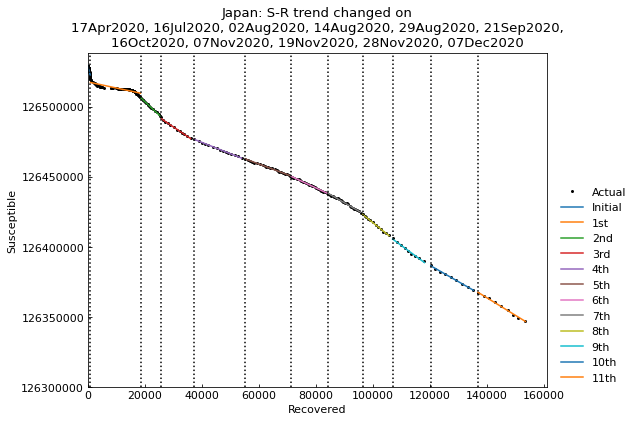

,Type,Start,End,Population
0th,Past,06Feb2020,16Apr2020,126529100
1st,Past,17Apr2020,15Jul2020,126529100
2nd,Past,16Jul2020,01Aug2020,126529100
3rd,Past,02Aug2020,13Aug2020,126529100
4th,Past,14Aug2020,28Aug2020,126529100
5th,Past,29Aug2020,20Sep2020,126529100
6th,Past,21Sep2020,15Oct2020,126529100
7th,Past,16Oct2020,06Nov2020,126529100
8th,Past,07Nov2020,18Nov2020,126529100
9th,Past,19Nov2020,27Nov2020,126529100


In [8]:
# Perform S-R trend analysis and set phases
snl.trend(set_phases=True)
snl.summary()

### Hyperparameter estimation of ODE models
Here, we will estimate the parameter values of SIR-derived models. As an example, we use SIR-F model. Details of models will be explained in [Usage (details: theoritical datasets)](https://lisphilar.github.io/covid19-sir/usage_theoretical.html).

In [9]:
# Estimate the parameter values of SIR-F model
snl.estimate(cs.SIRF)


<SIR-F model: parameter estimation>
Running optimization with 4 CPUs...


	 3rd phase (16Jul2020 - 01Aug2020): finished  841 trials in 0 min 30 sec


	 8th phase (21Sep2020 - 15Oct2020): finished  682 trials in 0 min 20 sec

	 4th phase (14Aug2020 - 28Aug2020): finished  914 trials in 0 min 30 sec

	 1st phase (07Nov2020 - 18Nov2020): finished 1089 trials in 0 min 50 sec

	 0th phase (29Aug2020 - 20Sep2020): finished  617 trials in 0 min 30 sec

	 6th phase (28Nov2020 - 06Dec2020): finished  229 trials in 0 min 10 sec

	10th phase (16Oct2020 - 06Nov2020): finished 2883 trials in 3 min  0 sec

	 2nd phase (02Aug2020 - 13Aug2020): finished 2891 trials in 3 min  0 sec

	 9th phase (07Dec2020 - 15Dec2020): finished  438 trials in 0 min 20 sec

	11th phase (06Feb2020 - 16Apr2020): finished 2713 trials in 3 min  1 sec

	 7th phase (17Apr2020 - 15Jul2020): finished 2922 trials in 3 min  0 sec

	 5th phase (19Nov2020 - 27Nov2020): finished 3266 trials in 3 min  0 sec

Completed optimization. Total: 6 min 32 sec


In [10]:
# Show the sumamry of parameter estimation
snl.summary()

,Type,Start,End,Population,ODE,Rt,theta,kappa,rho,sigma,tau,1/beta [day],alpha1 [-],1/alpha2 [day],1/gamma [day],RMSLE,Trials,Runtime
0th,Past,06Feb2020,16Apr2020,126529100,SIR-F,4.73,0.016776,0.000335,0.051836,0.010442,720,9,0.017,1491,47,0.258962,2713,3 min 1 sec
1st,Past,17Apr2020,15Jul2020,126529100,SIR-F,0.53,0.089110,0.000187,0.016164,0.027502,720,30,0.089,2667,18,0.354214,2922,3 min 0 sec
2nd,Past,16Jul2020,01Aug2020,126529100,SIR-F,1.89,0.000307,0.000071,0.072534,0.038320,720,6,0.000,7057,13,0.028269,841,0 min 30 sec
3rd,Past,02Aug2020,13Aug2020,126529100,SIR-F,1.61,0.000276,0.000168,0.052619,0.032457,720,9,0.000,2973,15,0.039975,2891,3 min 0 sec
4th,Past,14Aug2020,28Aug2020,126529100,SIR-F,0.83,0.000938,0.000403,0.040119,0.047945,720,12,0.001,1240,10,0.014972,914,0 min 30 sec
5th,Past,29Aug2020,20Sep2020,126529100,SIR-F,0.77,0.018663,0.000019,0.039565,0.050359,720,12,0.019,26518,9,0.018969,617,0 min 30 sec
6th,Past,21Sep2020,15Oct2020,126529100,SIR-F,0.93,0.000652,0.000594,0.042304,0.045014,720,11,0.001,841,11,0.033486,682,0 min 20 sec
7th,Past,16Oct2020,06Nov2020,126529100,SIR-F,1.11,0.000171,0.000619,0.051834,0.046086,720,9,0.000,807,10,0.032457,2883,3 min 0 sec
8th,Past,07Nov2020,18Nov2020,126529100,SIR-F,1.61,0.000461,0.000455,0.067696,0.041515,720,7,0.000,1098,12,0.010608,1089,0 min 50 sec
9th,Past,19Nov2020,27Nov2020,126529100,SIR-F,1.53,0.000041,0.000496,0.067956,0.044058,720,7,0.000,1008,11,0.022996,3266,3 min 0 sec


### Accuracy of estimation

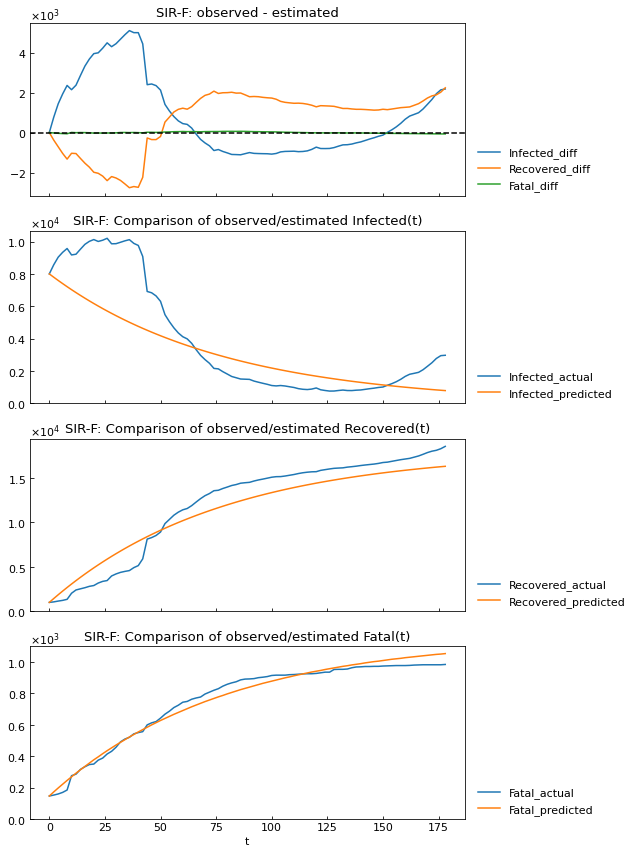

In [11]:
snl.estimate_accuracy(phase="1st")

### Get parameter value

In [12]:
snl.get("Rt", phase="4th")

0.83

### Show parameter history

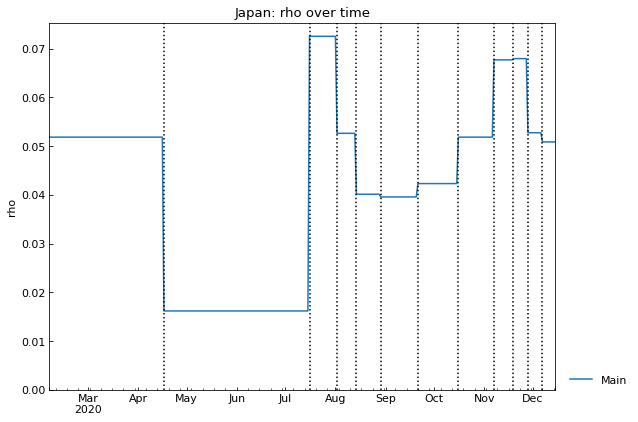

In [13]:
_ = snl.history(target="rho")

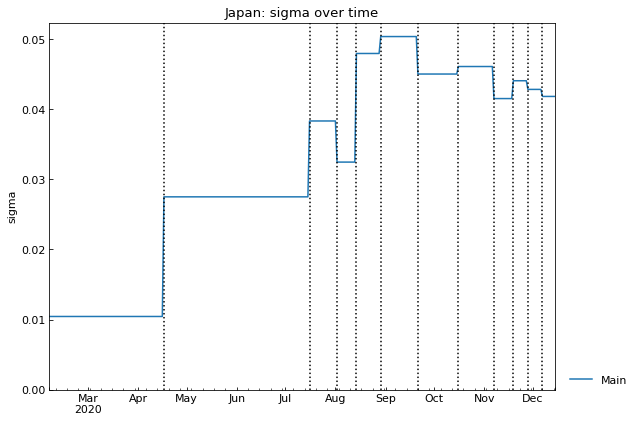

In [14]:
_ = snl.history(target="sigma")

### Show the history of reproduction number

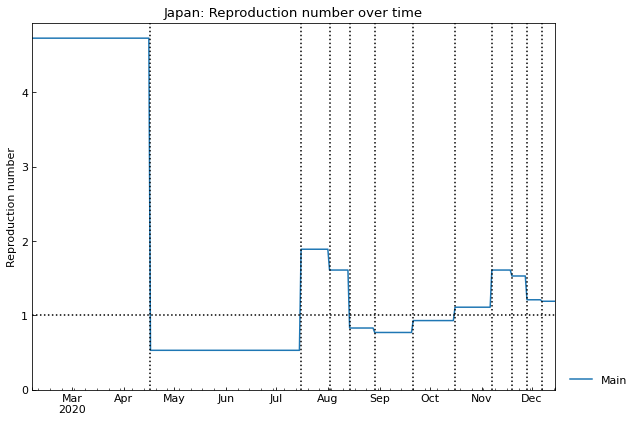

In [15]:
_ = snl.history(target="Rt")

### Simulate the number of cases

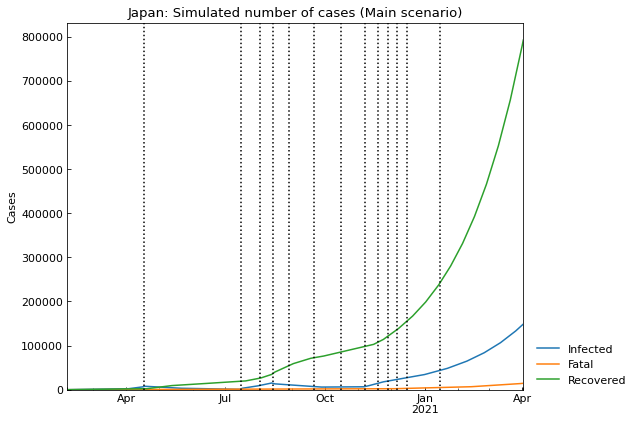

,Date,Confirmed,Fatal,Infected,Recovered
417,2021-03-29,897419,13626,139604,744189
418,2021-03-30,911631,13845,141825,755961
419,2021-03-31,926065,14067,144079,767919
420,2021-04-01,940728,14293,146368,780067
421,2021-04-02,955620,14523,148691,792406


In [16]:
snl.clear(name="Main")
snl.add(days=30)
snl.add(end_date="01Apr2021", name="Main")
main_sim_df = snl.simulate(name="Main")
main_sim_df.tail()

### Simulate another scenario
If $\sigma$ will be double in 30 days, how many cases will be?

In [17]:
sigma_current = snl.get("sigma", name="Main", phase="last")
sigma_current

0.041820297925430676

In [18]:
sigma_new = sigma_current * 2
sigma_new

0.08364059585086135

In [19]:
snl.clear(name="Medicine")
snl.add(name="Medicine", days=30, sigma=sigma_current)
snl.add(name="Medicine", end_date="01Apr2021", sigma=sigma_new)
snl.summary()

Type      Start        End  Population    ODE    Rt  \
Scenario Phase                                                          
Main     0th      Past  06Feb2020  16Apr2020   126529100  SIR-F  4.73   
         1st      Past  17Apr2020  15Jul2020   126529100  SIR-F  0.53   
         2nd      Past  16Jul2020  01Aug2020   126529100  SIR-F  1.89   
         3rd      Past  02Aug2020  13Aug2020   126529100  SIR-F  1.61   
         4th      Past  14Aug2020  28Aug2020   126529100  SIR-F  0.83   
         5th      Past  29Aug2020  20Sep2020   126529100  SIR-F  0.77   
         6th      Past  21Sep2020  15Oct2020   126529100  SIR-F  0.93   
         7th      Past  16Oct2020  06Nov2020   126529100  SIR-F  1.11   
         8th      Past  07Nov2020  18Nov2020   126529100  SIR-F  1.61   
         9th      Past  19Nov2020  27Nov2020   126529100  SIR-F  1.53   
         10th     Past  28Nov2020  06Dec2020   126529100  SIR-F  1.21   
         11th     Past  07Dec2020  15Dec2020   126529100  SIR-F  1.19   
         12th   Future  16Dec2020  14Jan2021   126529100  SIR-F  1.19   
         13th   Future  15Jan2021  01Apr2021   126529100  SIR-F  1.19   
Medicine 0th      Past  06Feb2020  16Apr2020   126529100  SIR-F  4.73   
         1st      Past  17Apr2020  15Jul2020   126529100  SIR-F  0.53   
         2nd      Past  16Jul2020  01Aug2020   126529100  SIR-F  1.89   
         3rd      Past  02Aug2020  13Aug2020   126529100  SIR-F  1.61   
         4th      Past  14Aug2020  28Aug2020   126529100  SIR-F  0.83   
         5th      Past  29Aug2020  20Sep2020   126529100  SIR-F  0.77   
         6th      Past  21Sep2020  15Oct2020   126529100  SIR-F  0.93   
         7th      Past  16Oct2020  06Nov2020   126529100  SIR-F  1.11   
         8th      Past  07Nov2020  18Nov2020   126529100  SIR-F  1.61   
         9th      Past  19Nov2020  27Nov2020   126529100  SIR-F  1.53   
         10th     Past  28Nov2020  06Dec2020   126529100  SIR-F  1.21   
         11th     Past  07Dec2020  15Dec2020   126529100  SIR-F  1.19   
         12th   Future  16Dec2020  14Jan2021   126529100  SIR-F  1.19   
         13th   Future  15Jan2021  01Apr2021   126529100  SIR-F  0.60   

                   theta     kappa       rho     sigma  tau  1/beta [day]  \
Scenario Phase                                                              
Main     0th    0.016776  0.000335  0.051836  0.010442  720             9   
         1st    0.089110  0.000187  0.016164  0.027502  720            30   
         2nd    0.000307  0.000071  0.072534  0.038320  720             6   
         3rd    0.000276  0.000168  0.052619  0.032457  720             9   
         4th    0.000938  0.000403  0.040119  0.047945  720            12   
         5th    0.018663  0.000019  0.039565  0.050359  720            12   
         6th    0.000652  0.000594  0.042304  0.045014  720            11   
         7th    0.000171  0.000619  0.051834  0.046086  720             9   
         8th    0.000461  0.000455  0.067696  0.041515  720             7   
         9th    0.000041  0.000496  0.067956  0.044058  720             7   
         10th   0.000350  0.000711  0.052736  0.042823  720             9   
         11th   0.000163  0.000769  0.050852  0.041820  720             9   
         12th   0.000163  0.000769  0.050852  0.041820  720             9   
         13th   0.000163  0.000769  0.050852  0.041820  720             9   
Medicine 0th    0.016776  0.000335  0.051836  0.010442  720             9   
         1st    0.089110  0.000187  0.016164  0.027502  720            30   
         2nd    0.000307  0.000071  0.072534  0.038320  720             6   
         3rd    0.000276  0.000168  0.052619  0.032457  720             9   
         4th    0.000938  0.000403  0.040119  0.047945  720            12   
         5th    0.018663  0.000019  0.039565  0.050359  720            12   
         6th    0.000652  0.000594  0.042304  0.045014  720            11   
         7th    0.000171  0.000619  0.051834  0.046086  

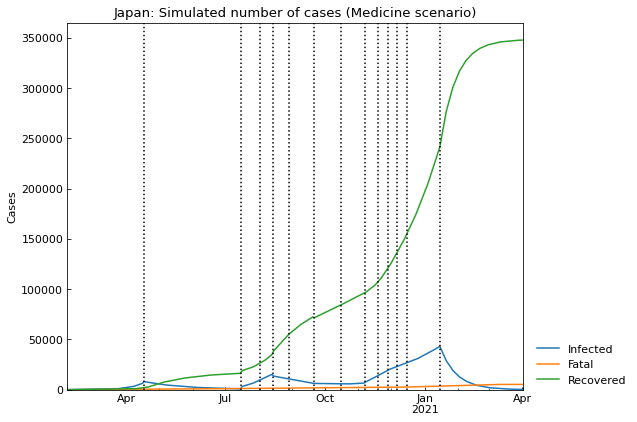

,Date,Confirmed,Fatal,Infected,Recovered
417,2021-03-29,353015,5261,316,347438
418,2021-03-30,353046,5261,296,347489
419,2021-03-31,353076,5262,277,347537
420,2021-04-01,353103,5262,259,347582
421,2021-04-02,353129,5263,242,347624


In [20]:
snl.simulate(name="Medicine").tail()

### Compare the scenarios
We will compare the scenarios with representative values, reproduction number and parameter values.

In [21]:
snl.describe()

,max(Infected),argmax(Infected),Confirmed on 02Apr2021,Infected on 02Apr2021,Fatal on 02Apr2021,13th_Rt
Main,148691,02Apr2021,955620,148691,14523,1.19
Medicine,43165,15Jan2021,353129,242,5263,0.60


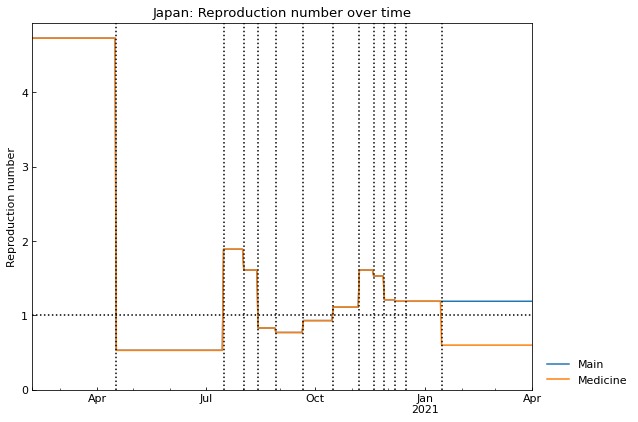

In [22]:
_ = snl.history(target="Rt")

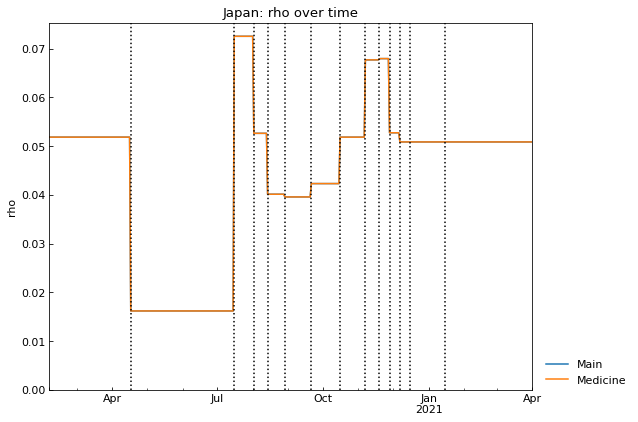

In [23]:
_ = snl.history(target="rho")

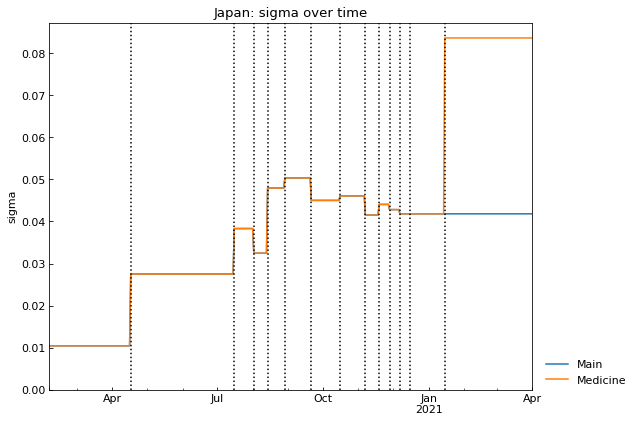

In [24]:
_ = snl.history(target="sigma")

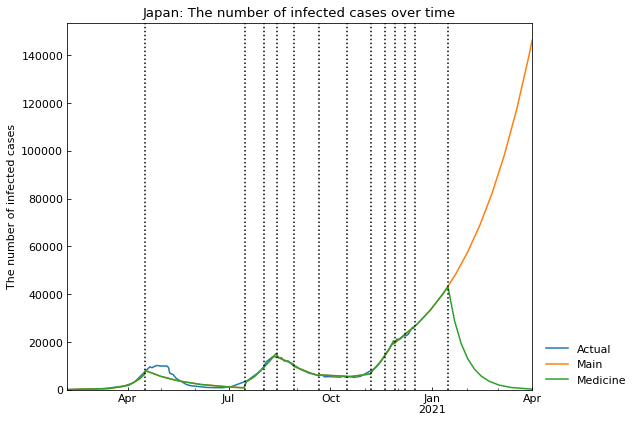

In [25]:
_ = snl.history(target="Infected")

### Change rate of parameters in main scenario
History of each parameter will be shown. Values will be divided by the values in 0th phase.

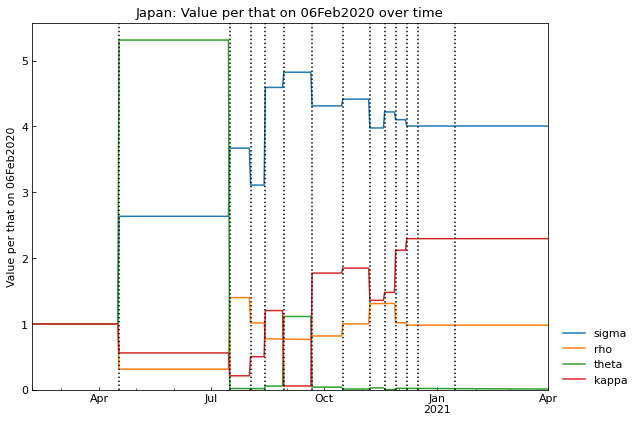

In [26]:
_ = snl.history_rate(name="Main")

## Retrospective analysis
We can evaluate the impact of measures using past records. How many people were infected if the parameter values have not changed sinse 01Sep2020?

In [27]:
# Perform retrospective analysis
snl_retro = cs.Scenario(jhu_data, population_data, "Japan")
snl_retro.retrospective("01Sep2020", model=cs.SIRF, control="Main", target="Retrospective")


<SIR-F model: parameter estimation>
Running optimization with 4 CPUs...


	 3rd phase (16Jul2020 - 01Aug2020): finished  656 trials in 0 min 30 sec


	 8th phase (21Sep2020 - 15Oct2020): finished  217 trials in 0 min 10 sec

	 2nd phase (01Sep2020 - 20Sep2020): finished  221 trials in 0 min 10 sec

	 4th phase (14Aug2020 - 28Aug2020): finished  919 trials in 0 min 40 sec

	11th phase (07Nov2020 - 18Nov2020): finished  974 trials in 0 min 40 sec

	 0th phase (28Nov2020 - 06Dec2020): finished  299 trials in 0 min 10 sec

	 6th phase (29Aug2020 - 31Aug2020): finished  319 trials in 0 min 10 sec

	10th phase (16Oct2020 - 06Nov2020): finished 2951 trials in 3 min  0 sec

	 1st phase (02Aug2020 - 13Aug2020): finished 3030 trials in 3 min  0 sec

	 9th phase (07Dec2020 - 15Dec2020): finished  651 trials in 0 min 20 sec

	12th phase (06Feb2020 - 16Apr2020): finished 3076 trials in 3 min  0 sec

	 7th phase (17Apr2020 - 15Jul2020): finished 3119 trials in 3 min  0 sec

	 5th phase (19Nov2020 - 27Nov2020): finished 3791 trials in 3 min  0 sec

Completed optimization. Total: 6 min 42 sec



<SIR-F model: parameter estimation>
Running optimization with 4 CPUs...


	 4th phase (01Sep2020 - 15Dec2020): finished 9039 trials in 3 min  0 sec

Completed optimization. Total: 3 min  0 sec


In [28]:
# Show the summary of estimation
cols = ["Start", "End", "ODE", "Rt", *cs.SIRF.PARAMETERS] + ["RMSLE", "Trials", "Runtime"]
snl_retro.summary(columns=cols)

Start        End    ODE    Rt     theta     kappa  \
Scenario      Phase                                                          
Main          0th    06Feb2020  16Apr2020  SIR-F  4.73  0.018042  0.000230   
              1st    17Apr2020  15Jul2020  SIR-F  0.53  0.089110  0.000187   
              2nd    16Jul2020  01Aug2020  SIR-F  1.89  0.000307  0.000071   
              3rd    02Aug2020  13Aug2020  SIR-F  1.61  0.000276  0.000168   
              4th    14Aug2020  28Aug2020  SIR-F  0.83  0.000938  0.000403   
              5th    29Aug2020  31Aug2020  SIR-F  0.92  0.016413  0.000059   
              6th    01Sep2020  20Sep2020  SIR-F  0.72  0.017083  0.000180   
              7th    21Sep2020  15Oct2020  SIR-F  0.95  0.001820  0.000531   
              8th    16Oct2020  06Nov2020  SIR-F  1.11  0.000171  0.000619   
              9th    07Nov2020  18Nov2020  SIR-F  1.59  0.000650  0.000386   
              10th   19Nov2020  27Nov2020  SIR-F  1.53  0.000041  0.000496   
              11th   28Nov2020  06Dec2020  SIR-F  1.21  0.000350  0.000711   
              12th   07Dec2020  15Dec2020  SIR-F  1.17  0.001013  0.000772   
Retrospective 0th    06Feb2020  16Apr2020  SIR-F  4.73  0.018042  0.000230   
              1st    17Apr2020  15Jul2020  SIR-F  0.53  0.089110  0.000187   
              2nd    16Jul2020  01Aug2020  SIR-F  1.89  0.000307  0.000071   
              3rd    02Aug2020  13Aug2020  SIR-F  1.61  0.000276  0.000168   
              4th    14Aug2020  28Aug2020  SIR-F  0.83  0.000938  0.000403   
              5th    29Aug2020  31Aug2020  SIR-F  0.92  0.016413  0.000059   
              6th    01Sep2020  15Dec2020  SIR-F  0.92  0.016413  0.000059   

                          rho     sigma     RMSLE  Trials       Runtime  
Scenario      Phase                                                      
Main          0th    0.051459  0.010449  0.258673    3076  3 min  0 sec  
              1st    0.016164  0.027502  0.354214    3119  3 min  0 sec  
              2nd    0.072534  0.038320  0.028269     656  0 min 30 sec  
              3rd    0.052619  0.032457  0.039975    3030  3 min  0 sec  
              4th    0.040119  0.047945  0.014972     919  0 min 40 sec  
              5th    0.035715  0.038330  0.004003     319  0 min 10 sec  
              6th    0.039557  0.053682  0.040041     221  0 min 10 sec  
              7th    0.043749  0.045579  0.042829     217  0 min 10 sec  
              8th    0.051834  0.046086  0.032457    2951  3 min  0 sec  
              9th    0.067036  0.041778  0.014380     974  0 min 40 sec  
              10th   0.067956  0.044058  0.022996    3791  3 min  0 sec  
              11th   0.052736  0.042823  0.011879     299  0 min 10 sec  
              12th   0.050805  0.042519  0.013058     651  0 min 20 sec  
Retrospective 0th    0.051459  0.010449  0.258673    3076  3 min  0 sec  
              1st    0.016164  0.027502  0.354214    3119  3 min  0 sec  
              2nd    0.072534  0.038320  0.028269     656  0 min 30 sec  
              3rd    0.052619  0.032457  0.039975    3030  3 min  0 sec  
              4th    0.040119  0.047945  0.014972     919  0 min 40 sec  
              5th    0.035715  0.038330  0.004003     319  0 min 10 sec  
              6th    0.035715  0.038330  0.449036    9039  3 min  0 sec

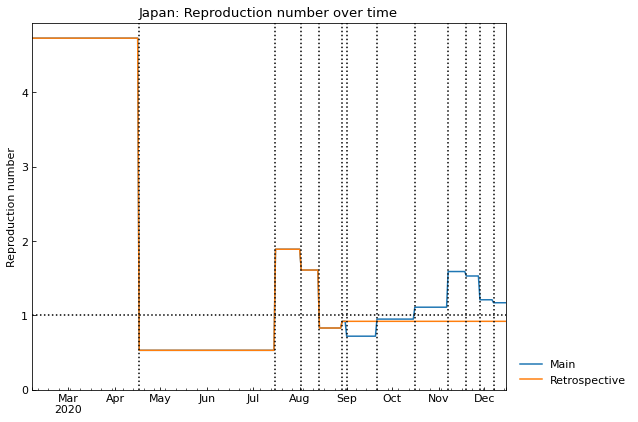

In [29]:
# History of reproduction number
_ = snl_retro.history("Rt")

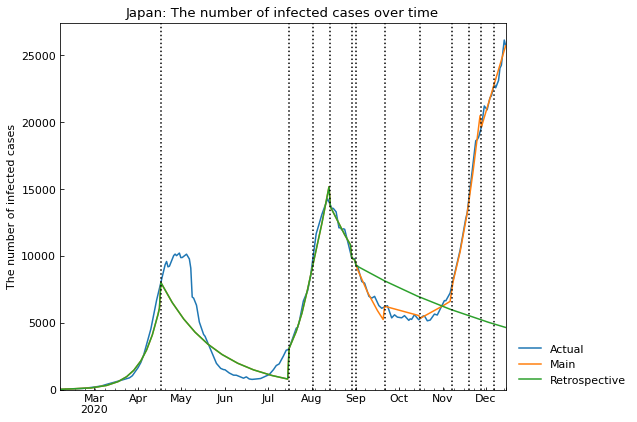

In [30]:
# History of Infected
_ = snl_retro.history("Infected")

In [31]:
# Show the representative values
snl_retro.describe()

,max(Infected),argmax(Infected),Confirmed on 16Dec2020,Infected on 16Dec2020,Fatal on 16Dec2020,6th_Rt,7th_Rt,8th_Rt,9th_Rt,10th_Rt,11th_Rt,12th_Rt
Main,26078,16Dec2020,184366,26078,2697,0.72,0.95,1.11,1.59,1.53,1.21,1.17
Retrospective,15160,13Aug2020,118928,4619,2209,0.92,-,-,-,-,-,-
